In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

In [2]:
rent_path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/rent.csv'
rent = pd.read_csv(rent_path)

rent_words_path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/rent_title_words.csv'
rent_words = pd.read_csv(rent_words_path)

df_path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/df_plot.csv'
df = pd.read_csv(df_path)

<br><br><br>

## Add density plots

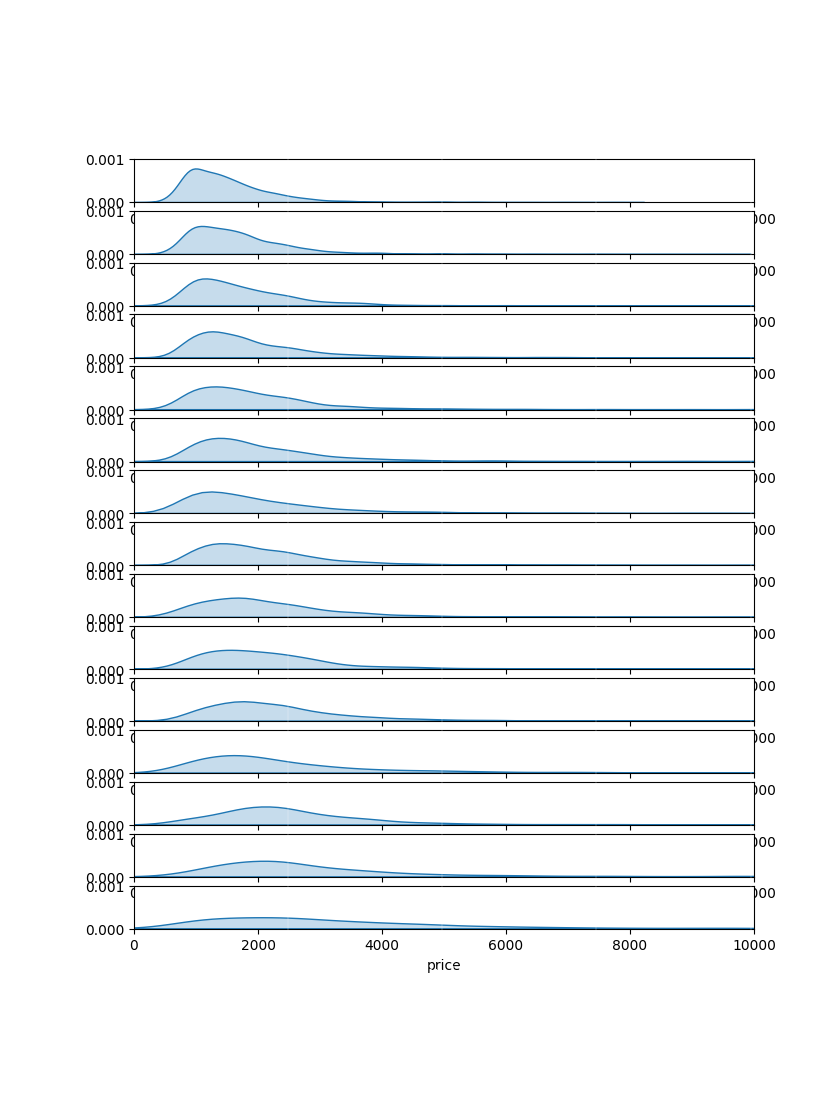

In [3]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        #color='grey',
        #edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    #axs[i].axvline(global_mean, color='white', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    # axs[i].text(
    #     -600, 0,
    #     f'({avg_bedrooms})',
    #     ha='left',
    #     fontsize=10,
    #     fontproperties=fira_sans_regular,
    #     color='white'
    # )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color='white'
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    # for j in range(len(quantiles) - 1):
    #     axs[i].fill_between(
    #         [quantiles[j], # lower bound
    #          quantiles[j+1]], # upper bound
    #         0, # max y=0
    #         0.0002, # max y=0.0002
    #         color='white'
    #     )

    # mean value as a reference
    mean = subset['price'].mean()
    #axs[i].scatter([mean], [0.0001], color='white', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    # if i == 14:
    #     values = [2500, 5000, 7500, 10000]
    #     for value in values:
    #         axs[i].text(
    #             value, -0.0005,
    #             f'{value}',
    #             ha='center',
    #             fontsize=10
    #         )

    # remove axis
    #axs[i].set_axis_off()

text = 'Median rent'
# fig.text(
#     0.35, 0.88,
#     text,
#     ha='center',
#     fontsize=10,
#     color='white'
# )

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
# fig.text(
#     0.04, 0.88,
#     text,
#     ha='left',
#     fontsize=10,
#     fontproperties=fira_sans_regular,
#     color='white'
# )

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
# subax.set_xticks([])
# subax.set_yticks([])
# beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
# quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
# quantiles = quantiles.tolist()
# for j in range(len(quantiles) - 1):
#     subax.fill_between(
#         [quantiles[j], # lower bound
#          quantiles[j+1]], # upper bound
#         0, # max y=0
#         0.00004, # max y=0.00004
#         color='white'
#     )
# subax.set_xlim(-500, 7000)
# subax.set_ylim(-0.0002, 0.0006)
# mean = beautiful_subset['price'].mean()
# subax.scatter([mean], [0.00002], color='white', s=10)
# subax.text(
#     -300, 0.0005,
#     'Legend',
#     ha='left',
#     fontsize=12,
#     fontproperties=fira_sans_semibold,
#     color='white'
# )
# subax.text(
#     4800, 0.00025,
#     'Distribution\nof prices',
#     ha='center',
#     fontsize=7,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     mean+400, 0.00015,
#     'Median',
#     ha='center',
#     fontsize=7,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     5500, -0.00015,
#     "95% of prices",
#     ha='center',
#     fontsize=6,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     3500, -0.00015,
#     "80% of prices",
#     ha='center',
#     fontsize=6,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     1200, -0.00018,
#     "50% of prices\nfall within this range",
#     ha='center',
#     fontsize=6,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='white',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-1.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Change colors

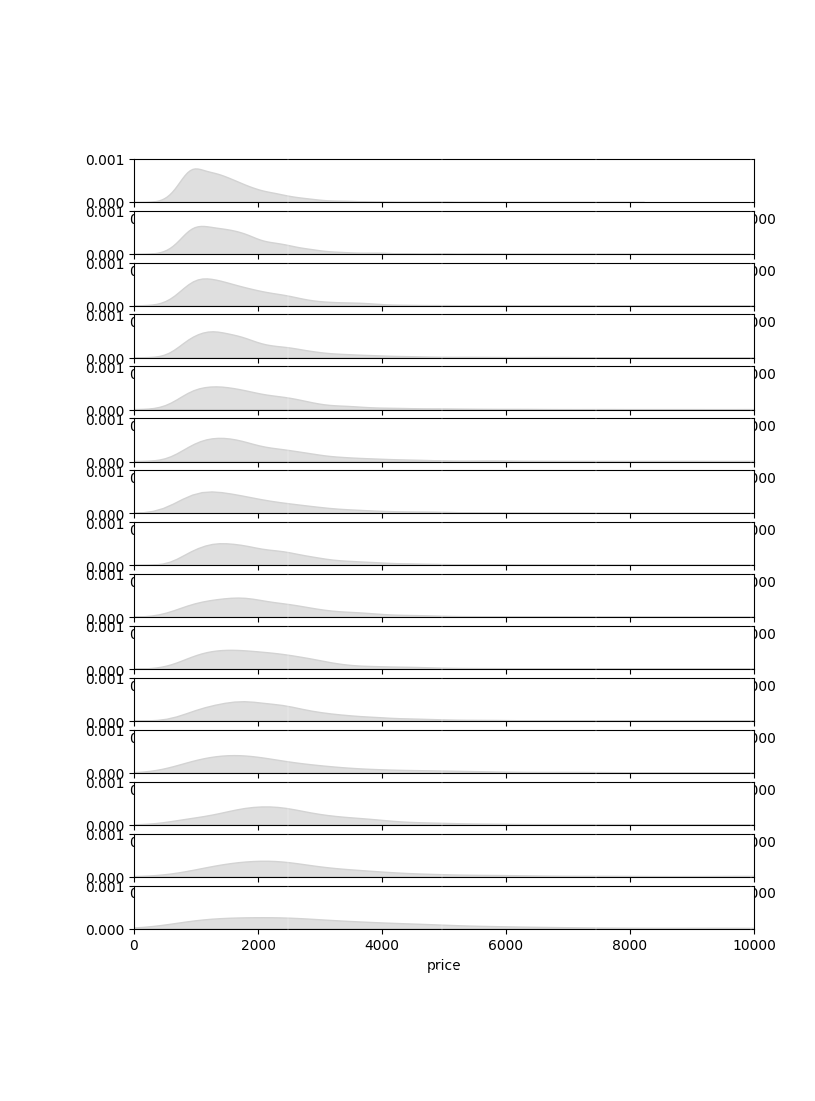

In [4]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    #axs[i].axvline(global_mean, color='white', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    # axs[i].text(
    #     -600, 0,
    #     f'({avg_bedrooms})',
    #     ha='left',
    #     fontsize=10,
    #     fontproperties=fira_sans_regular,
    #     color='white'
    # )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color='white'
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    # for j in range(len(quantiles) - 1):
    #     axs[i].fill_between(
    #         [quantiles[j], # lower bound
    #          quantiles[j+1]], # upper bound
    #         0, # max y=0
    #         0.0002, # max y=0.0002
    #         color='white'
    #     )

    # mean value as a reference
    mean = subset['price'].mean()
    #axs[i].scatter([mean], [0.0001], color='white', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    # if i == 14:
    #     values = [2500, 5000, 7500, 10000]
    #     for value in values:
    #         axs[i].text(
    #             value, -0.0005,
    #             f'{value}',
    #             ha='center',
    #             fontsize=10
    #         )

    # remove axis
    #axs[i].set_axis_off()

text = 'Median rent'
# fig.text(
#     0.35, 0.88,
#     text,
#     ha='center',
#     fontsize=10,
#     color='white'
# )

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
# fig.text(
#     0.04, 0.88,
#     text,
#     ha='left',
#     fontsize=10,
#     fontproperties=fira_sans_regular,
#     color='white'
# )

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
# subax.set_xticks([])
# subax.set_yticks([])
# beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
# quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
# quantiles = quantiles.tolist()
# for j in range(len(quantiles) - 1):
#     subax.fill_between(
#         [quantiles[j], # lower bound
#          quantiles[j+1]], # upper bound
#         0, # max y=0
#         0.00004, # max y=0.00004
#         color='white'
#     )
# subax.set_xlim(-500, 7000)
# subax.set_ylim(-0.0002, 0.0006)
# mean = beautiful_subset['price'].mean()
# subax.scatter([mean], [0.00002], color='white', s=10)
# subax.text(
#     -300, 0.0005,
#     'Legend',
#     ha='left',
#     fontsize=12,
#     fontproperties=fira_sans_semibold,
#     color='white'
# )
# subax.text(
#     4800, 0.00025,
#     'Distribution\nof prices',
#     ha='center',
#     fontsize=7,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     mean+400, 0.00015,
#     'Median',
#     ha='center',
#     fontsize=7,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     5500, -0.00015,
#     "95% of prices",
#     ha='center',
#     fontsize=6,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     3500, -0.00015,
#     "80% of prices",
#     ha='center',
#     fontsize=6,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
# subax.text(
#     1200, -0.00018,
#     "50% of prices\nfall within this range",
#     ha='center',
#     fontsize=6,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='white',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-2.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Remove axis

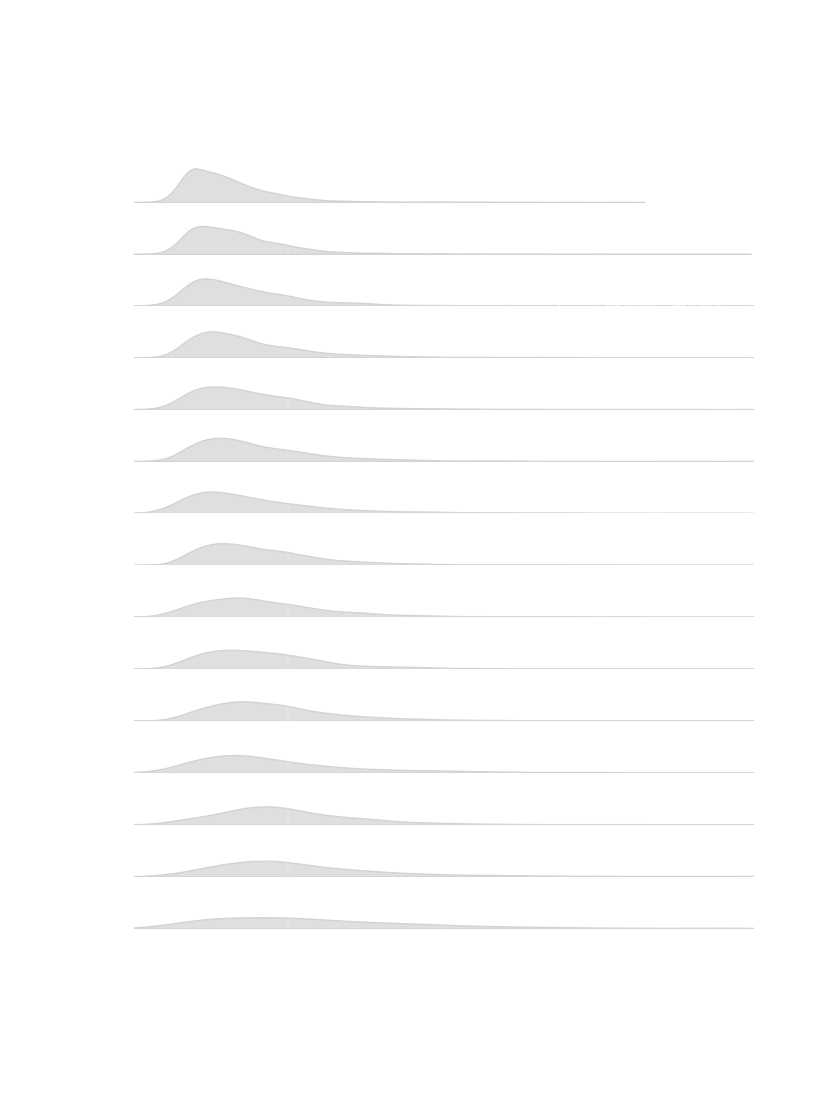

In [5]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    #axs[i].axvline(global_mean, color='white', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color='white'
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color='white'
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    # for j in range(len(quantiles) - 1):
    #     axs[i].fill_between(
    #         [quantiles[j], # lower bound
    #          quantiles[j+1]], # upper bound
    #         0, # max y=0
    #         0.0002, # max y=0.0002
    #         color='white'
    #     )

    # mean value as a reference
    mean = subset['price'].mean()
    #axs[i].scatter([mean], [0.0001], color='white', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    # if i == 14:
    #     values = [2500, 5000, 7500, 10000]
    #     for value in values:
    #         axs[i].text(
    #             value, -0.0005,
    #             f'{value}',
    #             ha='center',
    #             fontsize=10
    #         )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10,
    color='white'
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color='white'
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color='white'
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='white', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='white',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-3.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## label and scale (4)

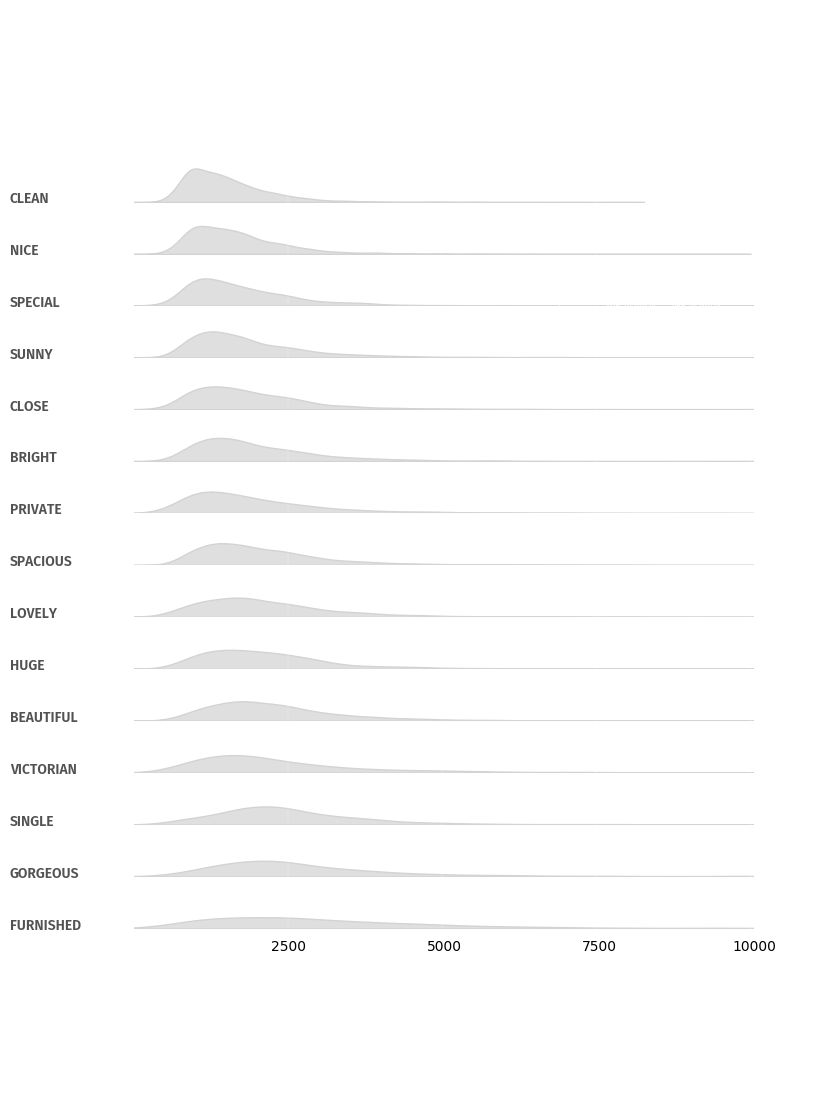

In [6]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    #axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color='white'
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    # for j in range(len(quantiles) - 1):
    #     axs[i].fill_between(
    #         [quantiles[j], # lower bound
    #          quantiles[j+1]], # upper bound
    #         0, # max y=0
    #         0.0002, # max y=0.0002
    #         color='white'
    #     )

    # mean value as a reference
    mean = subset['price'].mean()
    #axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10,
    color='white'
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color='white'
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color='white'
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='white', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='white',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-4.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## reference values (5)

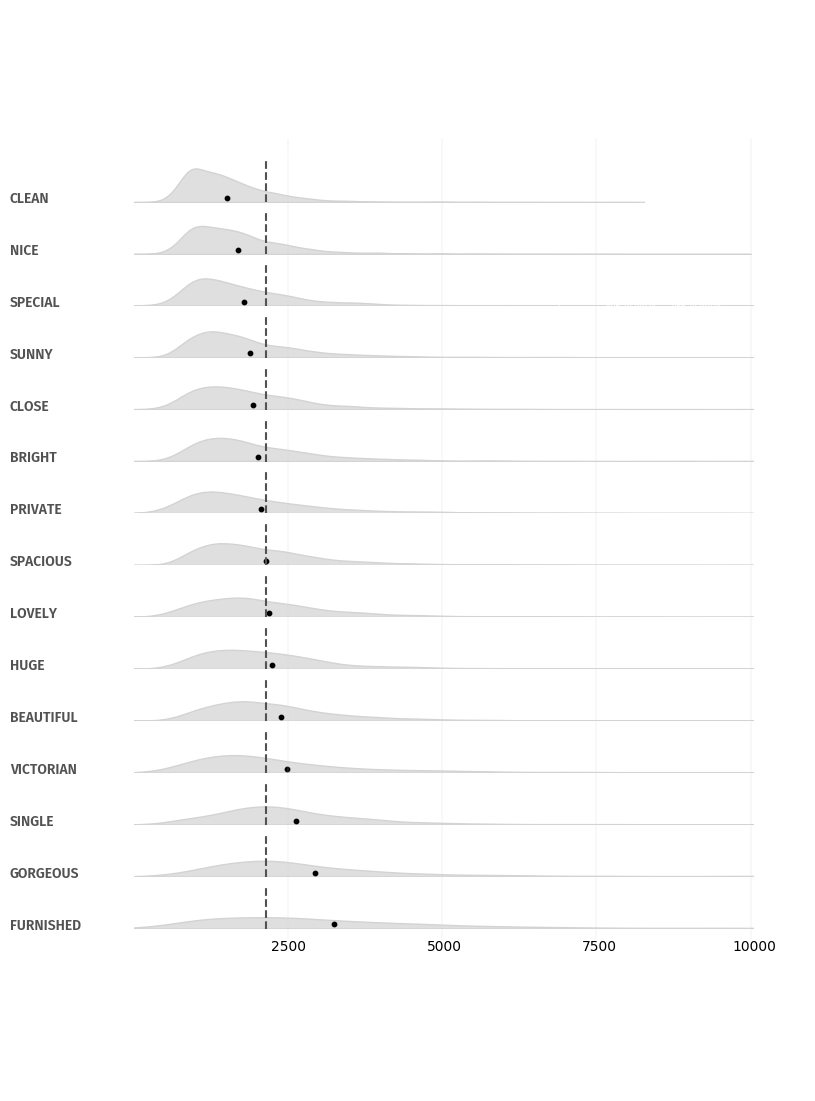

In [7]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color='white'
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    # for j in range(len(quantiles) - 1):
    #     axs[i].fill_between(
    #         [quantiles[j], # lower bound
    #          quantiles[j+1]], # upper bound
    #         0, # max y=0
    #         0.0002, # max y=0.0002
    #         color='white'
    #     )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10,
    color='white'
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color='white'
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color='white'
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='white', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-5.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Add quantiles

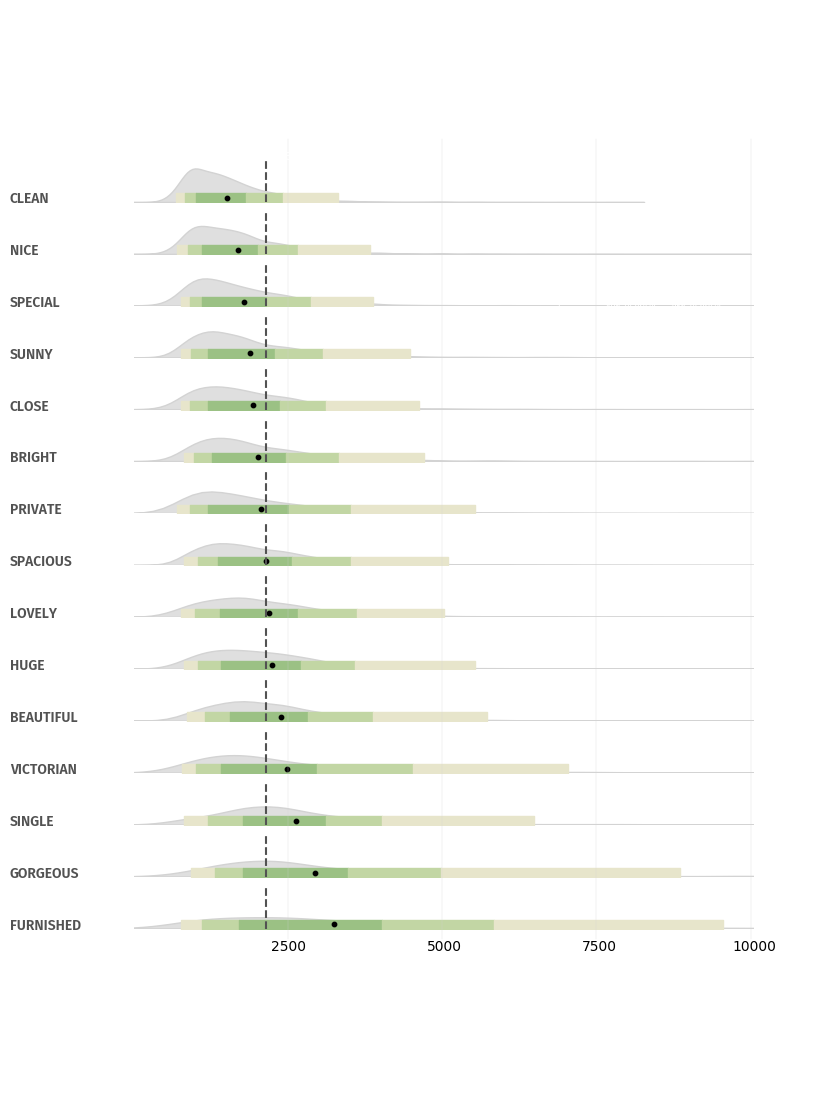

In [8]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color='white'
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10,
    color='white'
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color='white'
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color='white'
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='white', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-6.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Add average bedrooms

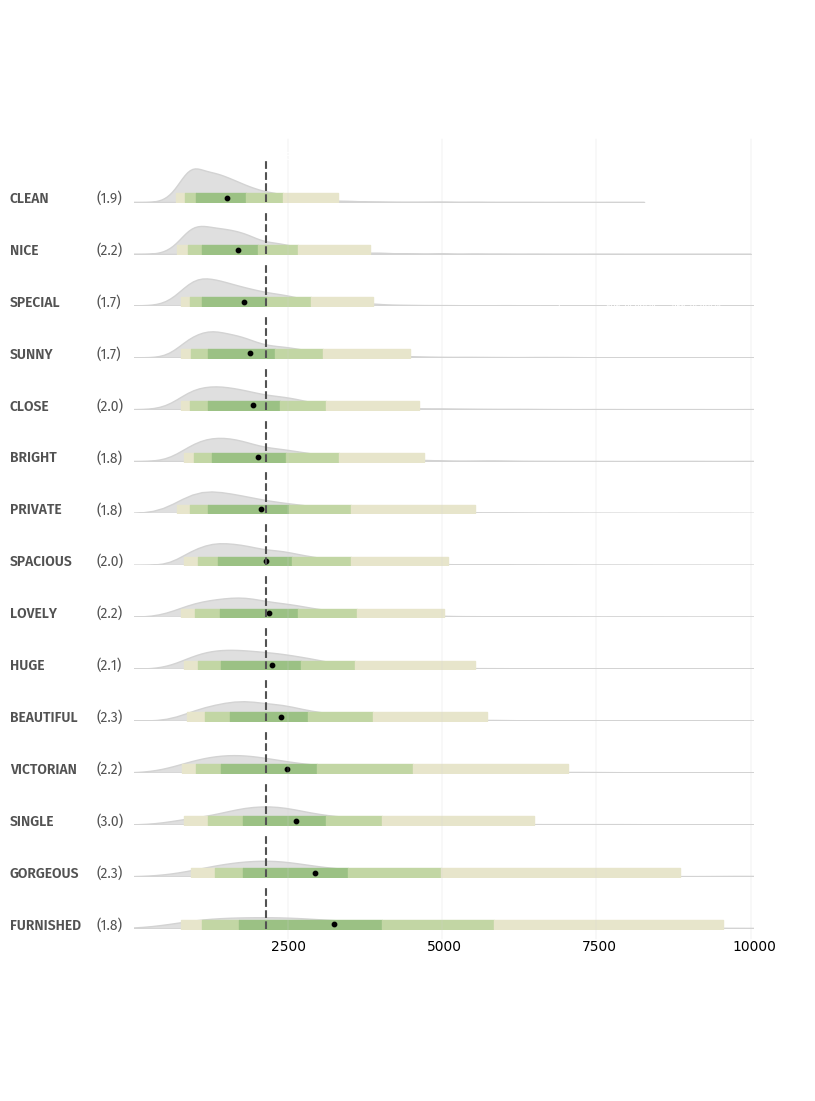

In [9]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10,
    color='white'
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular,
    color='white'
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular,
    color='white'
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold,
    color='white'
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular,
    color='white'
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color='white'
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='white', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-7.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Add credit and title

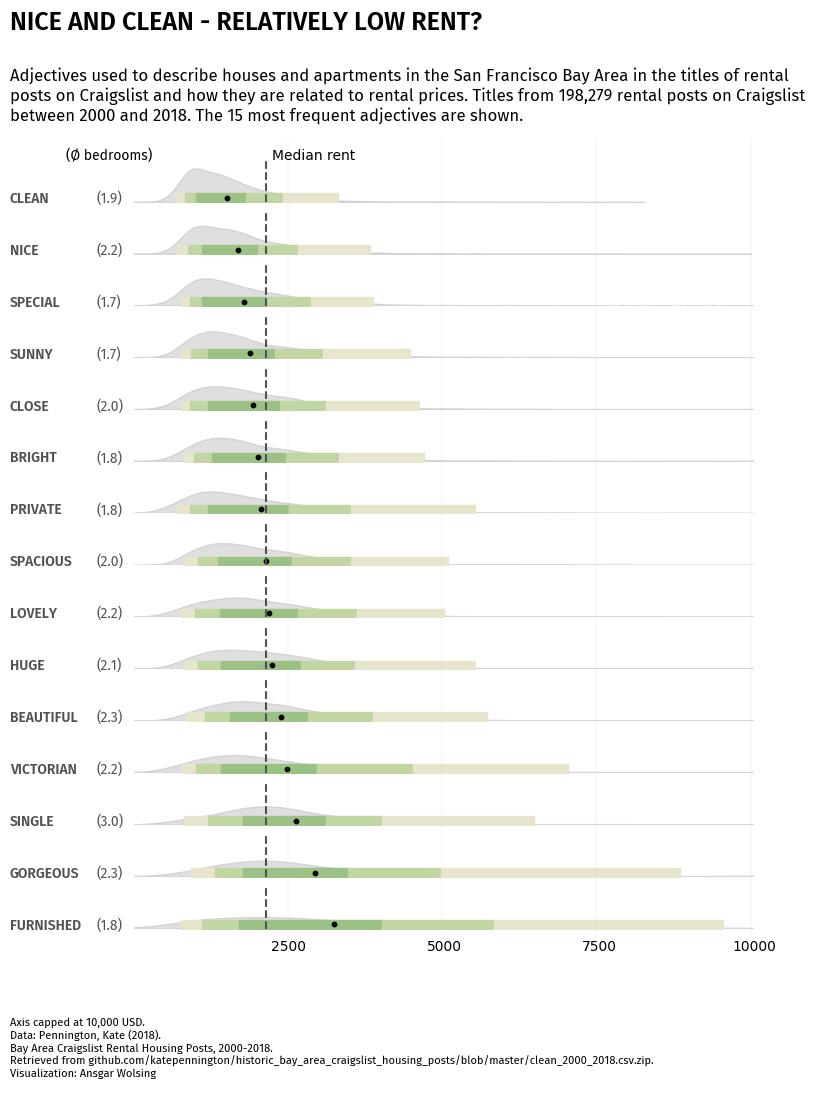

In [10]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
# sns.kdeplot(
#     beautiful_subset['price'],
#     fill=True,
#     ax=subax,
#     color='white',
#     edgecolor='white'
# )
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color='white'
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='white', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.set_axis_off()

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-8.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Fill new axe

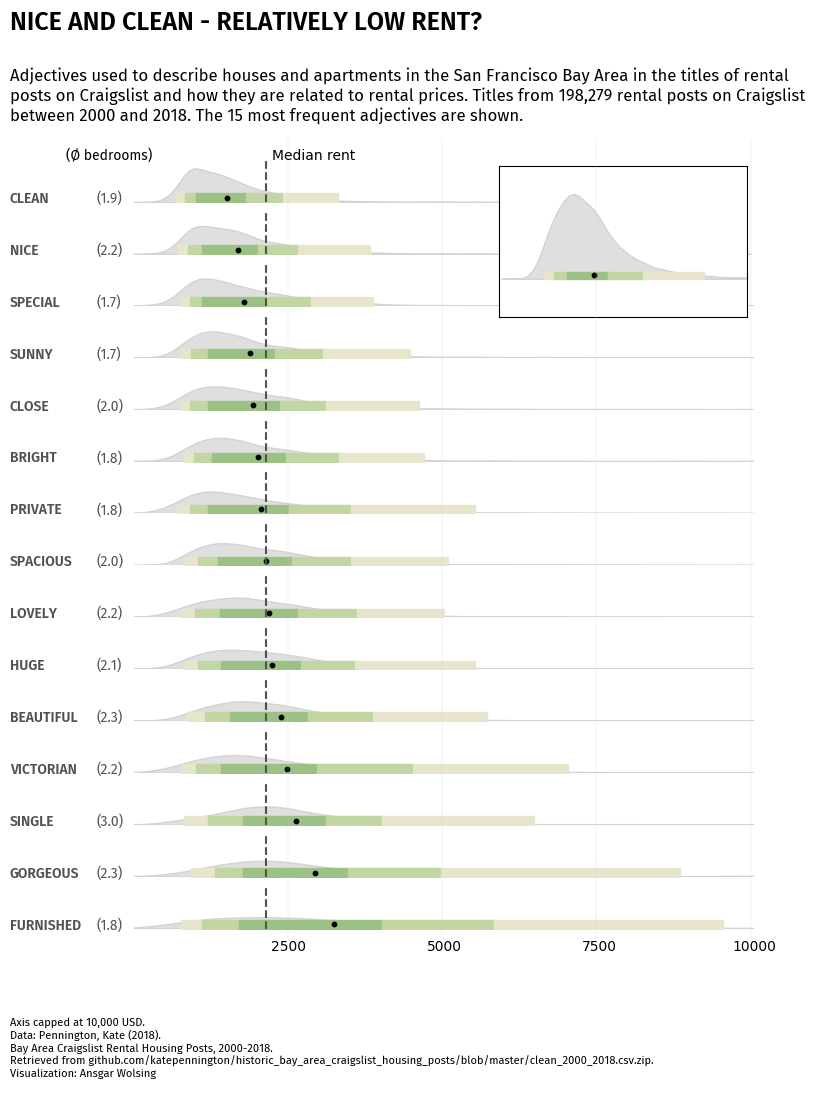

In [11]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
sns.kdeplot(
    beautiful_subset['price'],
    fill=True,
    ax=subax,
    color='grey',
    edgecolor='lightgrey'
)
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color=colors[j]
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='black', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
    color='white'
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
    color='white'
)
# subax.text(
#     mean+400, 0.00015,
#     'Median',
#     ha='center',
#     fontsize=7,
#     fontproperties=fira_sans_regular,
#     color='white'
# )
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
    color='white'
)

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="white", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
#add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-9.png', dpi=300, bbox_inches='tight')
plt.show()

<br><br><br>

## Annotation inside subax

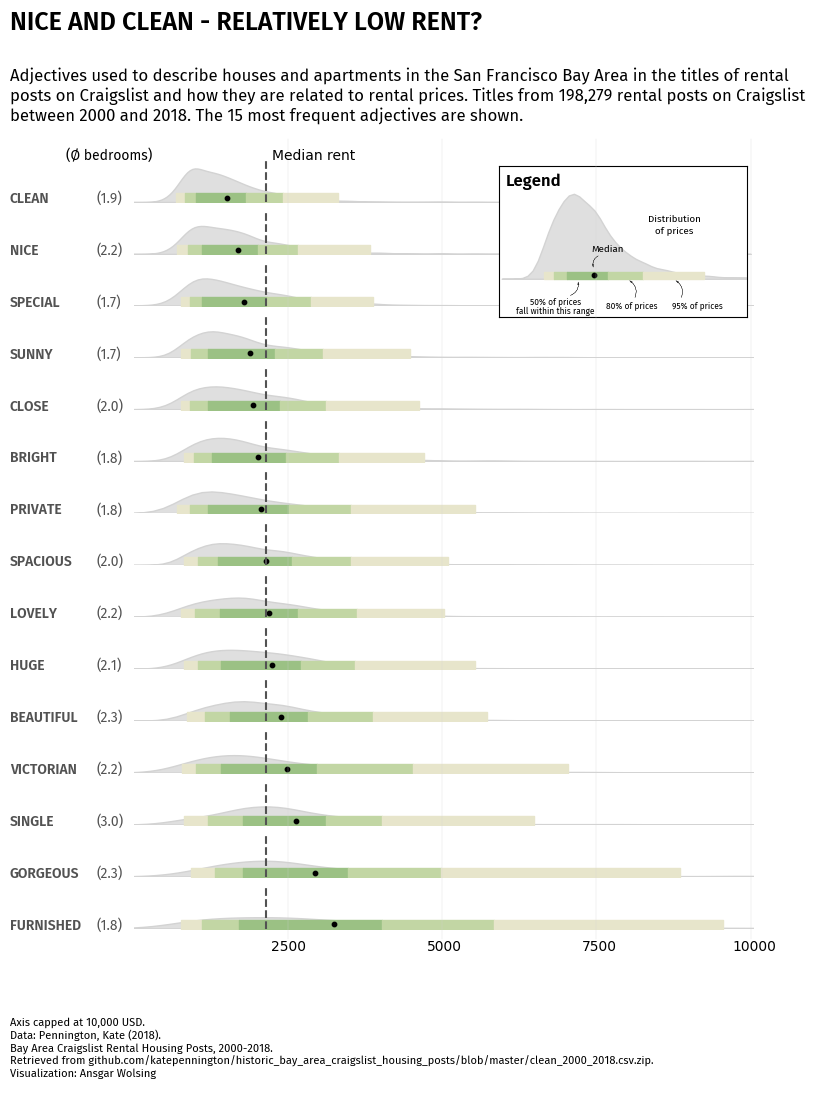

In [12]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
sns.kdeplot(
    beautiful_subset['price'],
    fill=True,
    ax=subax,
    color='grey',
    edgecolor='lightgrey'
)
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color=colors[j]
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='black', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
)

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="black", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-12.png', dpi=300, bbox_inches='tight')
plt.show()

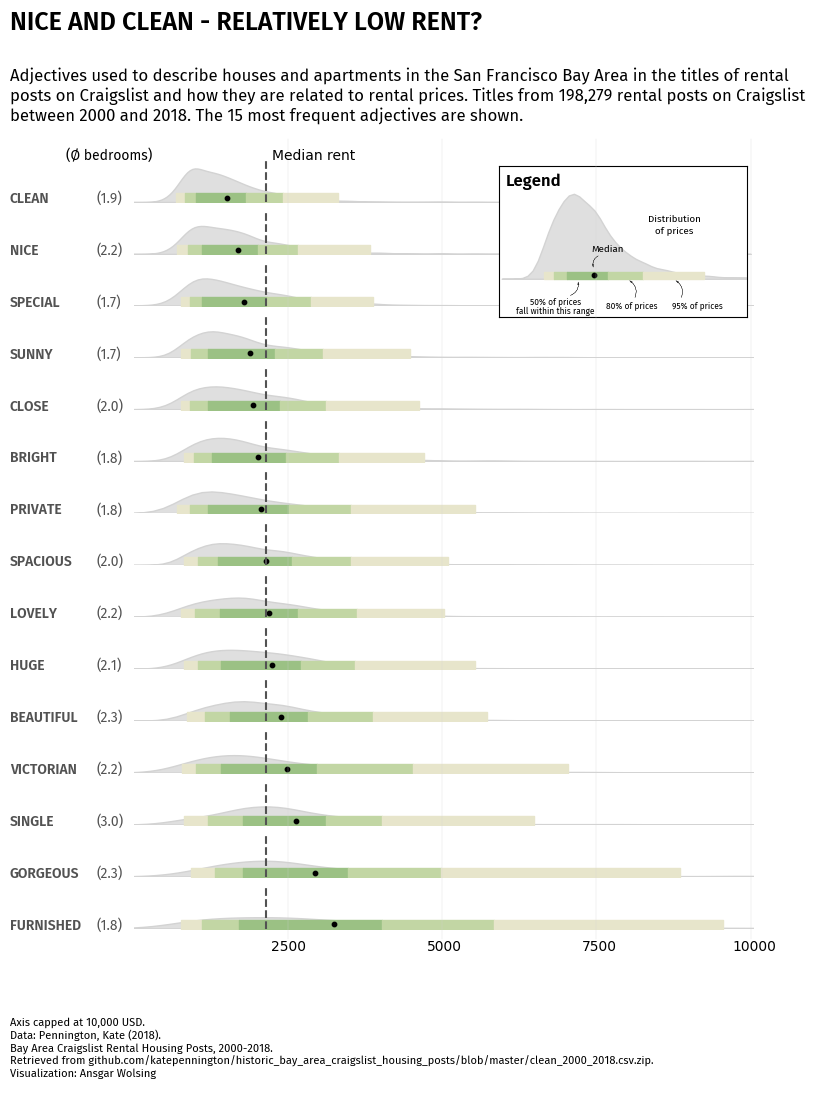

In [4]:
# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Regular.ttf'
fira_sans_regular = FontProperties(fname=font_path)
font_path = personal_path + 'FiraSans-SemiBold.ttf'
fira_sans_semibold = FontProperties(fname=font_path)

# colors
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lowgreen = '#E7E5CB'
colors = [lowgreen, midgreen, darkgreen, midgreen, lowgreen]
darkgrey = '#525252'

fig, axs = plt.subplots(nrows=15, ncols=1, figsize=(8, 10))
axs = axs.flatten() # needed to access each individual axis

# iterate over axes
words = df.sort_values('mean_price')['word'].unique().tolist()
for i, word in enumerate(words):

    # subset the data for each word
    subset = df[df['word'] == word]

    # plot the distribution of prices
    sns.kdeplot(
        subset['price'],
        fill=True,
        ax=axs[i],
        color='grey',
        edgecolor='lightgrey'
    )

    # global mean reference line
    global_mean = rent['price'].mean()
    axs[i].axvline(global_mean, color='#525252', linestyle='--')

    # display average number of bedrooms on left
    rent_with_bed = rent_words[rent_words['beds'] > 0]
    rent_with_bed_filter = rent_with_bed[rent_with_bed['word'] == word]
    avg_bedrooms = rent_with_bed_filter['beds'].mean().round(1)
    axs[i].text(
        -600, 0,
        f'({avg_bedrooms})',
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_regular,
        color=darkgrey
    )

    # display word on left
    axs[i].text(
        -2000, 0,
        word.upper(),
        ha='left',
        fontsize=10,
        fontproperties=fira_sans_semibold,
        color=darkgrey
    )

    # compute quantiles
    quantiles = np.percentile(subset['price'], [2.5, 10, 25, 75, 90, 97.5])
    quantiles = quantiles.tolist()

    # fill space between each pair of quantiles
    for j in range(len(quantiles) - 1):
        axs[i].fill_between(
            [quantiles[j], # lower bound
             quantiles[j+1]], # upper bound
            0, # max y=0
            0.0002, # max y=0.0002
            color=colors[j]
        )

    # mean value as a reference
    mean = subset['price'].mean()
    axs[i].scatter([mean], [0.0001], color='black', s=10)

    # set title and labels
    axs[i].set_xlim(0, 10000)
    axs[i].set_ylim(0, 0.001)
    axs[i].set_ylabel('')

    # x axis scale for last ax
    if i == 14:
        values = [2500, 5000, 7500, 10000]
        for value in values:
            axs[i].text(
                value, -0.0005,
                f'{value}',
                ha='center',
                fontsize=10
            )

    # remove axis
    axs[i].set_axis_off()

text = 'Median rent'
fig.text(
    0.35, 0.88,
    text,
    ha='center',
    fontsize=10
)

# credit
text = """
Axis capped at 10,000 USD.
Data: Pennington, Kate (2018). 
Bay Area Craigslist Rental Housing Posts, 2000-2018.
Retrieved from github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip.
Visualization: Ansgar Wolsing
"""
fig.text(
    -0.03, -0.05,
    text,
    ha='left',
    fontsize=8,
    fontproperties=fira_sans_regular
)

# x axis label
text = "Rent in USD"
fig.text(
    0.5, 0.06,
    text,
    ha='center',
    fontsize=14,
    fontproperties=fira_sans_regular,
    color='white'
)

# description
text = """
Adjectives used to describe houses and apartments in the San Francisco Bay Area in the titles of rental
posts on Craigslist and how they are related to rental prices. Titles from 198,279 rental posts on Craigslist
between 2000 and 2018. The 15 most frequent adjectives are shown.
"""
fig.text(
    -0.03, 0.9,
    text,
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_regular
)

# title
text = "NICE AND CLEAN - RELATIVELY LOW RENT?"
fig.text(
    -0.03, 1.01,
    text,
    ha='left',
    fontsize=18,
    fontproperties=fira_sans_semibold
)

# number of bedrooms label
text = '(Ø bedrooms)'
fig.text(
    0.04, 0.88,
    text,
    ha='left',
    fontsize=10,
    fontproperties=fira_sans_regular
)

# legend on the first ax
subax = inset_axes(
    parent_axes=axs[0],
    width="40%",
    height="350%",
    loc=1
)
subax.set_xticks([])
subax.set_yticks([])
beautiful_subset = df[df['word'] == 'beautiful']
sns.kdeplot(
    beautiful_subset['price'],
    fill=True,
    ax=subax,
    color='grey',
    edgecolor='lightgrey'
)
quantiles = np.percentile(beautiful_subset['price'], [2.5, 10, 25, 75, 90, 97.5])
quantiles = quantiles.tolist()
for j in range(len(quantiles) - 1):
    subax.fill_between(
        [quantiles[j], # lower bound
         quantiles[j+1]], # upper bound
        0, # max y=0
        0.00004, # max y=0.00004
        color=colors[j]
    )
subax.set_xlim(-500, 7000)
subax.set_ylim(-0.0002, 0.0006)
mean = beautiful_subset['price'].mean()
subax.scatter([mean], [0.00002], color='black', s=10)
subax.text(
    -300, 0.0005,
    'Legend',
    ha='left',
    fontsize=12,
    fontproperties=fira_sans_semibold,
)
subax.text(
    4800, 0.00025,
    'Distribution\nof prices',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
)
subax.text(
    mean+400, 0.00015,
    'Median',
    ha='center',
    fontsize=7,
    fontproperties=fira_sans_regular,
)
subax.text(
    5500, -0.00015,
    "95% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
)
subax.text(
    3500, -0.00015,
    "80% of prices",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
)
subax.text(
    1200, -0.00018,
    "50% of prices\nfall within this range",
    ha='center',
    fontsize=6,
    fontproperties=fira_sans_regular,
)

# arrows in the legend

def add_arrow(head_pos, tail_pos, ax):
    style = "Simple, tail_width=0.01, head_width=1, head_length=2"
    kw = dict(arrowstyle=style, color="black", linewidth=0.2)
    arrow = patches.FancyArrowPatch(
        tail_pos, head_pos,
        connectionstyle="arc3,rad=.5",
        **kw
    )
    ax.add_patch(arrow)
add_arrow((mean, 0.00005), (mean+200, 0.00013), subax) # median
add_arrow((mean+1000, 0), (mean+1200, -0.00011), subax) # 80%
add_arrow((mean+2400, 0), (mean+2600, -0.00011), subax) # 95%
add_arrow((mean-500, 0), (mean-800, -0.00009), subax) # 50%

# background grey lines

def add_line(xpos, ypos, fig=fig):
    line = Line2D(
        xpos, ypos,
        color='lightgrey',
        lw=0.2,
        transform=fig.transFigure
    )
    fig.lines.append(line)
add_line([0.317, 0.317], [0.1, 0.9])
add_line([0.51, 0.51], [0.1, 0.9])
add_line([0.703, 0.703], [0.1, 0.9])
add_line([0.896, 0.896], [0.1, 0.9])

plt.savefig('gif-12.png', dpi=300, bbox_inches='tight')
plt.show()